In [3]:
import numpy as np 
import matplotlib.pyplot as plt
a=np.arange(1.48,1)
h=2
for n in range(len(a)):
    n=n+1
print(n)

3


In [14]:
import openpyxl as op 
wb=op.Workbook()
wb.create_sheet('test')
wb.save('test.xlsx')


PermissionError: [Errno 13] Permission denied: 'test.xlsx'

In [15]:
wb=op.load_workbook('test.xlsx')
sh=wb['Sheet']
wb.close()
sh.cell(row=1,column=4,value='result')
wb.save('test.xlsx')

In [91]:
import numpy as np 
import pandas as pd 
from openpyxl.styles import fills,colors,NamedStyle,Font,Side,Border,PatternFill,Alignment,Protection
df=pd.read_excel('test.xlsx',sheet_name='test')
jg_name=df['name']
fwq_name=df['fwq_name']
wz=df['wz']
jg_name=df['name'].unique()
aaa=df[df['name']==jg_name[0]]

h=np.arange(1,48,1)
wb=op.load_workbook('test.xlsx')
sh=wb['Sheet']
fill = PatternFill(fill_type="solid",
        start_color='545454',#单元格填充色
        end_color='545454')
alignment=Alignment(horizontal='center')
bd = Border(left=Side(border_style="thin",
                  color='0000FF'),
        right=Side(border_style="double",
                   color='5C3317'),
        top=Side(border_style="thin",
                 color='FF110000'),
        bottom=Side(border_style="hair",
                    color='238E23'),
        diagonal=Side(border_style='dashed',#对角线
                      color='3299CC'),
        diagonal_direction=1,
        outline=Side(border_style='slantDashDot',#外边框
                     color='BC1717'),
        vertical=Side(border_style='medium',#竖直线
                      color=colors.BLACK),
        horizontal=Side(border_style='dotted',#水平线
                       color=colors.WHITE)
                    )

a=1
b=2
for t in range(1,2*(len(jg_name))+1):
    #sh.cell(row=1,column=2*a,value=jg_name[t-1])
   
    for n in h:
      
        fwq_row=n+1
        fwq_column=a
        fwq_value=48-n
        sh.cell(row=fwq_row,column=fwq_column,value=fwq_value)
        sh.cell(fwq_row,fwq_column).fill=fill
        sh.cell(fwq_row,fwq_column).alignment=alignment
        sh.cell(fwq_row,fwq_column).border=bd
    a=a+2
for t in range(1,len(jg_name)+1):
    sh.cell(row=1,column=b,value=jg_name[t-1])
    sh.cell(1,b).alignment=alignment 
    sh.cell(1,b).fill=fill
    sh.cell(1,b).border=bd
    b=b+4         
        

wb.save('test.xlsx')
    




In [76]:
import pandas as pd 
df=pd.read_excel('test.xlsx',sheet_name='test')
jg_name=df['name'].unique()
aaa=df[df['name']==jg_name[0]]
print(aaa)


name fwq_name  wz
0  aaa     a111   2
1  aaa     a222   3
2  aaa     a333   4
3  aaa     a444   5


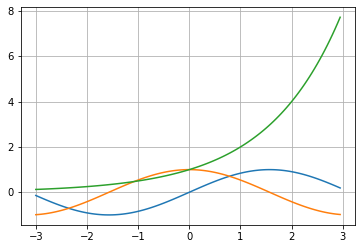

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

x=np.arange(-3,3,0.05)
y=np.sin(x)
z=np.cos(x)
t=2**x
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,t)
plt.grid()
plt.show()


In [61]:
import pandas as pd 
import numpy  as np 
import openpyxl as op 

path="c:/myobject/myobject/test.xlsx"
df=pd.DataFrame(pd.read_excel(path,'Sheet1'))
wb=op.load_workbook(path)
sh=wb['Sheet1']
#print(df['pdu_name'])
n=[i for i ,x in enumerate(df['pdu_name']) if x=="PDU01"]
z=df['sb_name'][n]
my_array=np.array(z)

for t in range(len(my_array)):
    
    sb_name_index=[i for i ,x in enumerate(df['sb_name']) if x==my_array[t]]
    print(sb_name_index)
    sb_name=np.array(df['sb_name'][sb_name_index])
    #sb_name=np.append(sb_name,sb_name)
    pdu_name=df['pdu_name'][sb_name_index]
    kg_no=df['kg_no'][sb_name_index]
    #sh.cell(row=t,column=4,sb_name)
    
    if t==0:

        for y in range(0,len(sb_name)):
            my_row=y+2
        
            sh.cell(row=my_row,column=4,value=sb_name[y])
    else:
        for x in range(len(sb_name)):
            my_row=my_row+1
            sh.cell(row=my_row,column=4,value=sb_name[x])
    #print(sb_name,pdu_name,kg_no)

df['aaa']=pdu_name
path1="c:/myobject/myobject/test_db.xlsx"
df.head(5)
df.to_excel(path)
#wb.save(path)



[0, 1]
[2, 3]
[4, 5, 6, 7]


In [123]:
import pandas as pd 
import numpy  as np 


path="c:/myobject/myobject/test.xlsx"
path1="c:/myobject/myobject/test1.xlsx"
path2="c:/myobject/myobject/test.csv"
df=pd.DataFrame(pd.read_excel(path,'Sheet1'))
cid=df.groupby(['sb_name']).cumcount()
print(cid)
df1 = df.assign(cid = df.groupby(['sb_name']).cumcount()).set_index(['sb_name', 'pdu_name', 'kg_no','cid']).unstack(-1).sort_index()
print(df1.columns)
#df1.columns = [f'{x}{y}' for x,y in df1.columns]
df1 = df1.reset_index()

new_data=df.groupby(['sb_name'],as_index=False)["pdu_name"].apply(list)
new_data.to_excel(path1)
#df1.to_excel(path1)
print(new_data)


0    0
1    1
2    0
3    1
4    0
5    1
6    2
7    3
8    0
9    1
dtype: int64
MultiIndex([], names=[None, 'cid'])
0                  [PDU01, PDU02]
1                  [PDU01, PDU04]
2    [PDU01, PDU02, PDU03, PDU04]
3                  [PDU02, PDU03]
dtype: object


In [188]:
import pandas as pd 
import numpy  as np 


path="c:/myobject/myobject/test.xlsx"
df1=pd.DataFrame(pd.read_excel(path,'Sheet1'))
df2=pd.DataFrame(pd.read_excel(path,'Sheet2'))
df1['pdu_name_kg']=df1['pdu_name']+df1['kg_no']
df2['pdu_name_kg']=df2['pdu_name']+df2['kg_no']
df1.sort_values('pdu_name_kg',inplace=True)
df2.sort_values('pdu_name_kg',inplace=True)
df2.head(20)
df3=df2[['pdu_name_kg','xw','I']]
print(df3)
df_out=pd.merge(df1,df3,on='pdu_name_kg',how='left')
df_out.head(20)
subtotal=df_out.groupby(['pdu_name','xw']).agg({'I':'sum'})
print(subtotal)
df_subtotal=pd.DataFrame(subtotal)
max_subtotal=df_subtotal.groupby(['pdu_name']).agg({'I':'max'})
print(max_subtotal)
df4=pd.merge(df_subtotal,max_subtotal,on='pdu_name',how='left')
print(df4)
# df4=df_out.loc[df_out['pdu_name']=='PDU01',['xw','I']]
# print(df4)


pdu_name_kg xw  I
0    PDU01N01  A  1
2    PDU01N02  A  3
4    PDU01N03  A  2
1    PDU02N01  B  2
5    PDU02N03  A  3
8    PDU02N04  A  3
9    PDU03N01  C  4
6    PDU03N03  B  3
3    PDU04N02  B  4
7    PDU04N03  B  1
               I
pdu_name xw     
PDU01    A   6.0
PDU02    A   6.0
         B   2.0
PDU03    B   3.0
         C   4.0
PDU04    B   5.0
            I
pdu_name     
PDU01     6.0
PDU02     6.0
PDU03     4.0
PDU04     5.0
          I_x  I_y
pdu_name          
PDU01     6.0  6.0
PDU02     6.0  6.0
PDU02     2.0  6.0
PDU03     3.0  4.0
PDU03     4.0  4.0
PDU04     5.0  5.0
